In [15]:
import networkx as nx
import numpy as np
import pandas as pd
import re
import io
import matplotlib.pylab as plt
from fa2 import ForceAtlas2
import json
import ast
from collections import Counter
import pickle

In [16]:
g = nx.read_gpickle("actors_graph.gpickle")

In [17]:
g.number_of_nodes()

18694

In [18]:
g.number_of_edges()

859402

In [19]:
degrees = g.degree()
list_degrees = sorted(degrees, key=lambda x: x[1], reverse=True)

In [20]:
print('Actor who has co-acted with most actors:',list_degrees[0][0])
print('Has acted with ' + str(list_degrees[0][1]) + ' different actors')

Actor who has co-acted with most actors: Samuel L. Jackson
Has acted with 1301 different actors


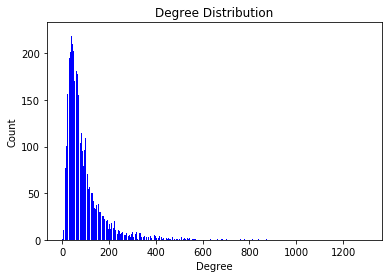

In [22]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

In [34]:
gc= max(nx.connected_component_subgraphs(g), key=len)
gc

In [35]:
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=True,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

In [36]:
# Warning! takes approx. 1 hour to run
positions = forceatlas2.forceatlas2_networkx_layout(gc, pos=None, iterations=5000)

100%|██████████| 5000/5000 [46:16<00:00,  1.80it/s]


BarnesHut Approximation  took  511.51  seconds
Repulsion forces  took  2140.55  seconds
Gravitational forces  took  6.57  seconds
Attraction forces  took  69.23  seconds
AdjustSpeedAndApplyForces step  took  29.68  seconds


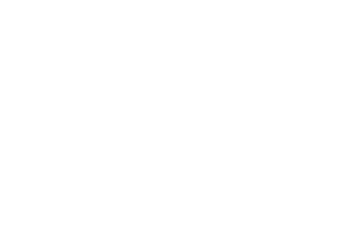

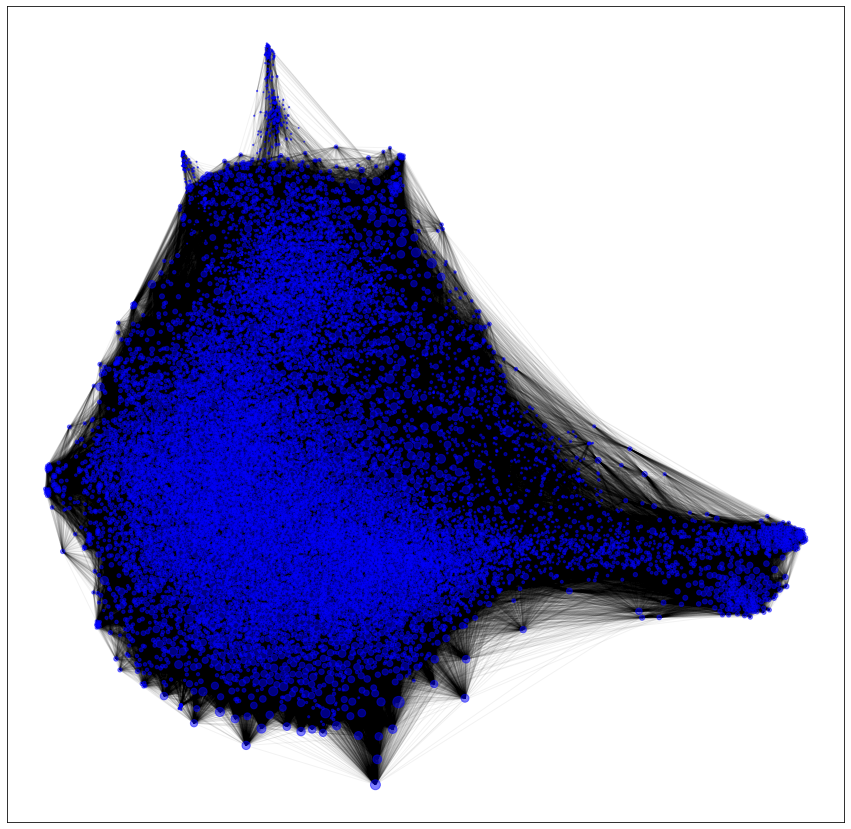

In [41]:
d = dict(gc.degree)
degrees = [(d[node])/10 for node in gc.nodes()]
plt.axis('off')
plt.figure(figsize=(15,15)) 
nx.draw_networkx_nodes(gc, positions ,node_color='blue', node_size= degrees, with_labels=False, alpha=0.5)
nx.draw_networkx_edges(gc, positions, alpha=0.05)
plt.show()